In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from random import sample
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector

In [167]:
#df1=pd.read_csv(r'C:\Users\kacpr\OneDrive - Akademia Górniczo-Hutnicza im. Stanisława Staszica w Krakowie\Licencjat\Dane\otomoto_offers_eng_23-04-2023.csv',delimiter=';')
df1=pd.read_csv(r"C:\Users\kacpr\OneDrive - Akademia Górniczo-Hutnicza im. Stanisława Staszica w Krakowie\Licencjat\Dane\otomoto_offers_eng_23-04-2023.csv",delimiter=';')

C:\Users\kacpr\AppData\Local\Temp\ipykernel_14080\4116198910.py:2: DtypeWarning: Columns (200) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv(r"C:\Users\kacpr\OneDrive - Akademia Górniczo-Hutnicza im. Stanisława Staszica w Krakowie\Licencjat\Dane\otomoto_offers_eng_23-04-2023.csv",delimiter=';')


# Proces przetwarzania i oczyszcania danych

In [168]:
df1.shape

(208205, 224)

In [169]:
df1.shape
df2=df1.copy()
df3= df2.copy()

C:\Users\kacpr\AppData\Local\Temp\ipykernel_14080\3467344261.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X=X.fillna(False)
C:\Users\kacpr\AppData\Local\Temp\ipykernel_14080\3467344261.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X=X.replace('Tak',True)


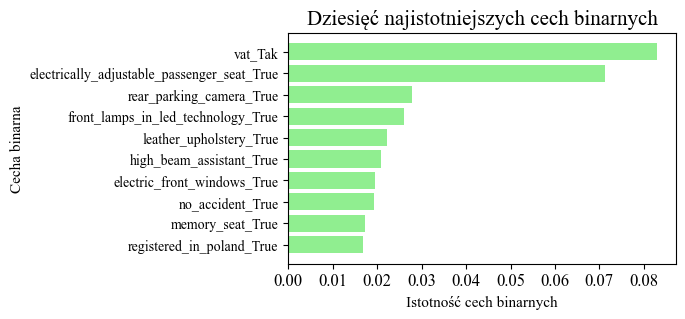

In [170]:
#Usunięcie zbędnych zmiennych
df4=df3.drop(['id','vat_margin','offer_from','category','offer_creation_date','financing_possibility','offer_title','show_offers_with_vin_number','location','version', 'color','color_type','generation'],axis=1).copy()
df3=df3.drop(['id','vat_margin','offer_from','category','offer_creation_date','financing_possibility','offer_title','show_offers_with_vin_number','location','version', 'color','color_type','generation'],axis=1).copy()

#Wybór kolumn od 17-end, czyli wszystkich binarnych
X=df3.iloc[:,17:]
df3=df3.drop(df3.iloc[:,17:],axis=1).copy()
X=X.fillna(False)
X=X.replace('Tak',True)
y=df3['price']

# Usuwanie kolumn, gdzie mniej niż 1% różnorodności (binarne)
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
selector.fit(X)
columns_to_remove = X.columns[~selector.get_support()]
X = selector.transform(X)

# Usuwanie kolumn, gdzie mniej niż 1% różnorodności (binarne)
df32 = df4.drop(columns=columns_to_remove, axis=1)
X=df32.iloc[:,17:]
X=X.fillna(0)
X = pd.get_dummies(X, drop_first=True)

# feature selection
import xgboost as xgb
import matplotlib.pyplot as plt

model = xgb.XGBRegressor()
model.fit(X, y)

xgb_importance = model.feature_importances_

sorted_idx = np.argsort(xgb_importance)[-10:]
plt.figure(figsize=(5, 3))
plt.barh(X.columns[sorted_idx], xgb_importance[sorted_idx], color='lightgreen')
plt.title("Dziesięć najistotniejszych cech binarnych", fontsize=15)
plt.xlabel("Istotność cech binarnych",fontsize=11)
plt.xticks(fontsize=12)
plt.ylabel('Cecha binarna', fontsize=11)

top_5_features = X.columns[sorted_idx][-5:]
plt.show()

## lista wybranych kolumn

In [171]:
variables_to_add = ['leather_upholstery', 'front_lamps_in_led_technology', 'rear_parking_camera', 'electrically_adjustable_passenger_seat', 'vat','no_accident','damaged']
df3 = pd.concat([df3, df2[variables_to_add]], axis=1)
df3['vat']=df3['vat'].fillna('Nie')
df3['electrically_adjustable_passenger_seat']=df3['electrically_adjustable_passenger_seat'].fillna(False)
df3['leather_upholstery']=df3['leather_upholstery'].fillna(False)
df3['front_lamps_in_led_technology']=df3['front_lamps_in_led_technology'].fillna(False)
df3['rear_parking_camera']=df3['rear_parking_camera'].fillna(False)
df3['no_accident']=df3['no_accident'].fillna(False)
df3['damaged']=df3['damaged'].fillna(False)

C:\Users\kacpr\AppData\Local\Temp\ipykernel_14080\1458003047.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3['electrically_adjustable_passenger_seat']=df3['electrically_adjustable_passenger_seat'].fillna(False)
C:\Users\kacpr\AppData\Local\Temp\ipykernel_14080\1458003047.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3['leather_upholstery']=df3['leather_upholstery'].fillna(False)
C:\Users\kacpr\AppData\Local\Temp\ipykernel_14080\1458003047.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and wil

# Transformacja danych

## Usunięcie jednostek z danych liczbowych oraz samochodów uszkodzonych

In [172]:
#przewalutowanie na PLN
df3['price'] = df3['price'].astype(float)
df3.loc[df3['currency'] == 'EUR', 'price'] *= 4.29
df3=df3.drop('currency',axis=1)

#Usuniecie samochodów z uszkodzeniami
filt=(df3['no_accident']==True)
df3=df3.loc[filt]
filt=(df3['damaged']=='Tak')
df3=df3.loc[~filt]
len(df3)

#usuniecie miar
df3['mileage'] = df3['mileage'].str.replace(' km','').str.replace(' ','').astype(float)
df3['engine_displacement'] = df3['engine_displacement'].str.replace(' cm3','').str.replace(' ','').astype(float)
df3['power'] = df3['power'].str.replace(' KM','').str.replace(' ','').astype(float)

#kolumna car age
df3['car_age'] = df3['production_year'].apply(lambda x: 2023 - x)
df3=df3.drop('production_year',axis=1)

#kolumna seller experience
df3['seller_experience'] = df3['seller_registration_year'].apply(lambda x: 2023 - x)
df3=df3.drop('seller_registration_year',axis=1)
#kolumna seller experience czyszczenie bledow - serwis OtoMoto powstał w 2004 roku(czyli 19 lat od 2023), a w danych znajduje sie 30 wartości które mają więcej niż 19 lat. Zamienie te wartości na średnią
filt=df3['seller_experience']>19
df3.loc[filt,'seller_experience']=df3['seller_experience'].mean()

C:\Users\kacpr\AppData\Local\Temp\ipykernel_14080\295677013.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.24230544880593' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df3.loc[filt,'seller_experience']=df3['seller_experience'].mean()


# Sprawdzenie wartości brakujących 

In [173]:
df4=df3.copy()
df4.isnull().values.any()

np.True_

#### Engine_displacement

In [174]:
df4['engine_displacement'].isnull().sum()
filt=(df4['fuel_type']=='Electric') | (df4['fuel_type']=='Hyrdrogen')
df4.loc[filt]

,price,seller_type,vehicle_brand,vehicle_model,mileage,engine_displacement,fuel_type,power,transmission,body_type,...,fuel_consumption_in_city,leather_upholstery,front_lamps_in_led_technology,rear_parking_camera,electrically_adjustable_passenger_seat,vat,no_accident,damaged,car_age,seller_experience
370,307100.0,Authorized Dealer,Skoda,Enyaq,10.0,NaN,Electric,204.0,Automatic,SUV,...,NaN,False,True,True,False,Nie,True,False,0,4.0
614,662900.0,Authorized Dealer,Mercedes-Benz,EQS,5.0,NaN,Electric,360.0,Automatic,SUV,...,NaN,True,False,True,True,Tak,True,False,1,13.0
744,46900.0,Dealer,Renault,Zoe,97000.0,NaN,Electric,88.0,Automatic,Compact,...,NaN,False,False,False,False,Nie,True,False,9,4.0
808,230000.0,Authorized Dealer,Skoda,Enyaq,18906.0,NaN,Electric,204.0,Automatic,SUV,...,NaN,False,True,True,False,Tak,True,False,2,6.0
879,389900.0,Authorized Dealer,Jaguar,I-Pace,17950.0,NaN,Electric,400.0,NaN,SUV,...,NaN,False,True,False,True,Tak,True,False,1,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207889,264900.0,Dealer,Volkswagen,Inny,1.0,NaN,Electric,204.0,Automatic,SUV,...,NaN,False,False,True,False,Tak,True,False,1,3.0
208076,84900.0,Authorized Dealer,Renault,Zoe,36809.0,NaN,Electric,109.0,Automatic,Compact,...,NaN,False,False,True,False,Tak,True,False,5,5.0
208098,390000.0,Authorized Dealer,Mercedes-Benz,EQC,8000.0,NaN,Electric,408.0,Automatic,SUV,...,NaN,False,True,True,True,Tak,True,False,1,15.0
208181,249000.0,Private person,Tesla,Model S,171800.0,NaN,Electric,700.0,Automatic,Sedan,...,NaN,False,False,False,False,Tak,True,False,8,9.0


In [175]:
df4.loc[filt,'engine_displacement']=0
df4['engine_displacement'].isnull().sum()
df4['engine_displacement'] = df4['engine_displacement'].fillna(df4['engine_displacement'].mean())

#### Number of doors

In [176]:
df4['number_of_doors'].isnull().sum()
filt = df4['number_of_doors'].isnull()
df4 = df4.loc[~filt]

#### Number of seats

In [177]:
df4['number_of_seats'].isnull().sum()
df4=df4.drop('number_of_seats',axis=1)

#### Fuel consumption

In [178]:
df4['fuel_consumption_in_city'].isnull().sum()
df4=df4.drop('fuel_consumption_in_city',axis=1)

#### Mileage

In [179]:
(df4['mileage'].isnull()).value_counts()

mileage
False    114707
True       1200
Name: count, dtype: int64

In [180]:
df4.loc[(df4['mileage'].isnull())]['state'].value_counts()

state
New    1200
Name: count, dtype: int64

In [181]:
df4.loc[df4['mileage'].isnull(), 'mileage'] = 0
new_data = df4.dropna(axis=0, how='any')
#**W zestawie danych jest 1200 braków w kolumnie mileage, ale występują one tylko w przypadku aut nowych. Założono, że jest on zerowy

#### Reszta braków

In [182]:
((len(df4)-len(new_data))/len(df4))*100
#Około 0.11 % danych miało jakieś wartości brakujące. Z uwagi na fakt, że jest to bardzo mała liczba to usunięto je z analizy
df4=new_data.copy()

# Sprawdzenie wartości odstających

### Wykresy przed usunięciem wartośći odstających

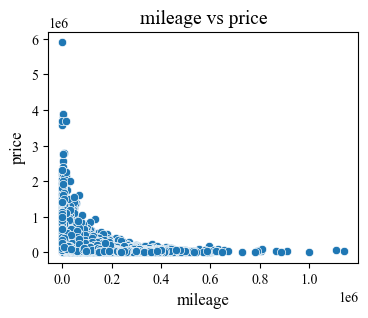

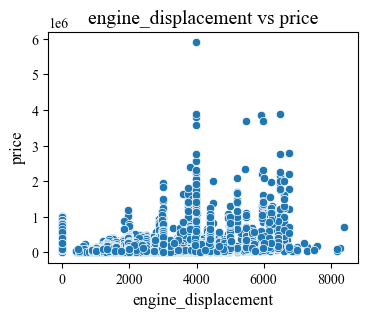

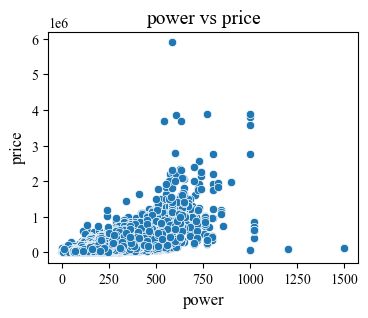

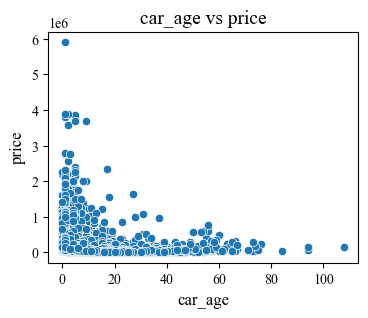

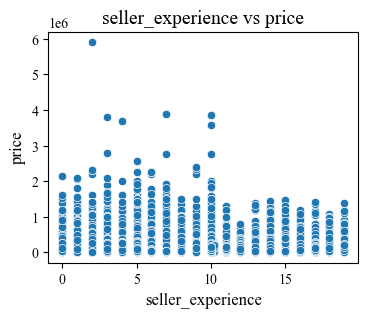

In [183]:
quantitative_vars = ['price', 'mileage', 'engine_displacement', 'power', 'car_age', 'seller_experience']
for var in quantitative_vars[1:]:
    plt.figure(figsize=(4, 3))
    sns.scatterplot(x=df4[var], y=df4['price'])
    plt.title(f'{var} vs price', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('price', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()


### Usunięcie wartości odstających

In [184]:
filt=df4['price']>1500000
df4=df4.loc[~filt]

In [185]:
filt=df4['power']>800
df4.loc[filt].count()

price                                     20
seller_type                               20
vehicle_brand                             20
vehicle_model                             20
mileage                                   20
engine_displacement                       20
fuel_type                                 20
power                                     20
transmission                              20
body_type                                 20
number_of_doors                           20
state                                     20
leather_upholstery                        20
front_lamps_in_led_technology             20
rear_parking_camera                       20
electrically_adjustable_passenger_seat    20
vat                                       20
no_accident                               20
damaged                                   20
car_age                                   20
seller_experience                         20
dtype: int64

In [186]:
filt=df4['power']>800
df4=df4.loc[~filt]

In [187]:
filt=df4['mileage']>1500000
df4=df4.loc[~filt]

In [188]:
filt=df4['car_age']>60
df4=df4.loc[~filt]

### Wybranie modeli, które mają co najmniej 100 obserwacji

In [189]:
len(df4)

115665

In [190]:
list=df4['vehicle_model'].value_counts()

In [191]:
filtered_models = list[list >= 100].index
df5 = df4[df4['vehicle_model'].isin(filtered_models)]

In [192]:
list[list >= 100].head(10)

vehicle_model
Octavia     2499
Astra       2466
A4          2155
Seria 3     2064
Seria 5     1980
Golf        1976
Focus       1906
Passat      1840
A6          1779
Insignia    1522
Name: count, dtype: int64

In [193]:
list[list >= 100].tail(20)

vehicle_model
Eclipse Cross        110
Leaf                 110
Captiva              109
Elantra              109
C5X                  108
9.mar                108
EQS                  108
C3 Picasso           107
Jogger               106
Jimny                106
V90 Cross Country    104
CX-30                103
Niro                 101
Tiguan Allspace      100
Ranger               100
Q2                   100
i10                  100
Altea XL             100
Cooper S             100
Modus                100
Name: count, dtype: int64

#### Usunięcie błędu związanego z tym samym nazewnictwem modeli

dwa modele Ferrari nie zostały usunięte ponieważ model o nazwie California również ma Volksvagen, dlatego nie zostały usuniete te dwa przypadki

In [194]:
ferrari_data = df5[df5['vehicle_brand'] == 'Ferrari']
ferrari_data

,price,seller_type,vehicle_brand,vehicle_model,mileage,engine_displacement,fuel_type,power,transmission,body_type,...,state,leather_upholstery,front_lamps_in_led_technology,rear_parking_camera,electrically_adjustable_passenger_seat,vat,no_accident,damaged,car_age,seller_experience
53663,646000.0,Authorized Dealer,Ferrari,California,68289.0,4297.0,Gasoline,460.0,Automatic,Cabriolet,...,Used,False,False,True,True,Nie,True,False,9,10.0
83835,750000.0,Private person,Ferrari,California,14950.0,3855.0,Gasoline,560.0,Automatic,Cabriolet,...,Used,True,False,True,True,Nie,True,False,7,9.0


In [195]:
df5 = df5[df5['vehicle_brand'] != 'Ferrari']

In [196]:
# Usunięcie wszystkich modeli oznaczonych jako inny
df5 = df5[df5['vehicle_model'] != 'Inny']


In [197]:
ferrari_data = df5[df5['vehicle_brand'] == 'Ferrari']
ferrari_data

,price,seller_type,vehicle_brand,vehicle_model,mileage,engine_displacement,fuel_type,power,transmission,body_type,...,state,leather_upholstery,front_lamps_in_led_technology,rear_parking_camera,electrically_adjustable_passenger_seat,vat,no_accident,damaged,car_age,seller_experience


### Zmiana typów danych na kategoryczne oraz numeryczne

In [198]:
categorical_columns = ['seller_type', 'fuel_type','vehicle_model','vehicle_brand', 'transmission', 'body_type','number_of_doors','state','leather_upholstery',
       'front_lamps_in_led_technology', 'rear_parking_camera',
       'electrically_adjustable_passenger_seat', 'vat']
numeric_features = ['price','power', 'mileage', 'car_age','engine_displacement','seller_experience']
df5[categorical_columns] = df5[categorical_columns].astype('category')
df5.drop(columns=['damaged'], inplace=True)
df5.drop(columns=['no_accident'], inplace=True)
df5[numeric_features]=df5[numeric_features].astype(np.float32)

# Charakterystyka zbioru danych i analiza wstępna

## Analiza korelacji i rozkładów zmiennych

Index(['price', 'power', 'car_age', 'mileage', 'transmission_Manual',
       'vat_Tak', 'state_Used', 'engine_displacement',
       'rear_parking_camera_True', 'front_lamps_in_led_technology_True',
       'electrically_adjustable_passenger_seat_True',
       'leather_upholstery_True', 'seller_type_Private person',
       'vehicle_brand_Mercedes-Benz', 'vehicle_brand_Porsche'],
      dtype='object')


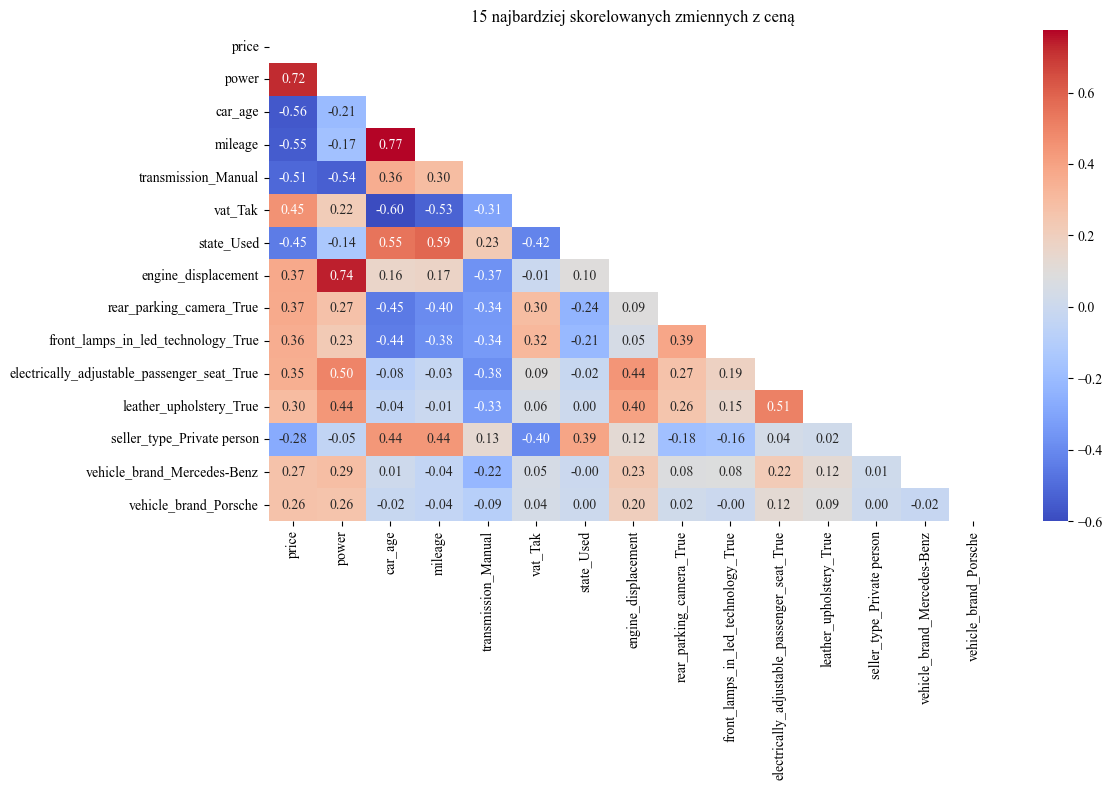

In [199]:
import seaborn as sns


df_encoded = pd.get_dummies(df5.drop(columns=['vehicle_model']), drop_first=True)

correlations = df_encoded.corr()['price'].abs().sort_values(ascending=False)

top_15_features = correlations.index[0:15]


import matplotlib.pyplot as plt

print(top_15_features)


plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(df_encoded[top_15_features].corr(), dtype=bool))
sns.heatmap(df_encoded[top_15_features].corr(), mask=mask, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("15 najbardziej skorelowanych zmiennych z ceną")
plt.tight_layout()
plt.show()

### Wykresy zależności zmiennych ilościowych ze zmienną price

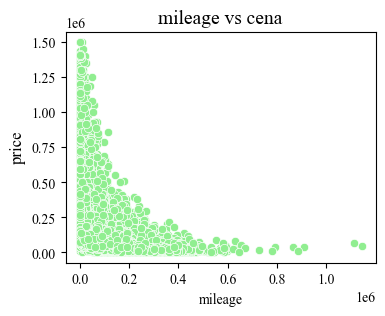

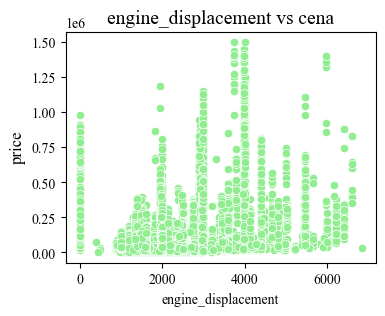

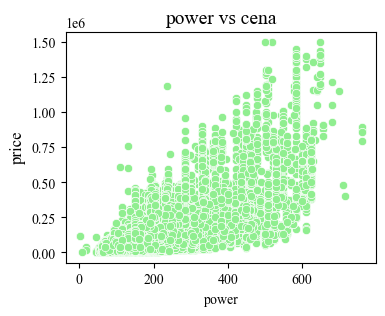

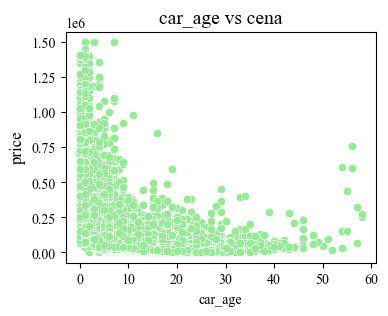

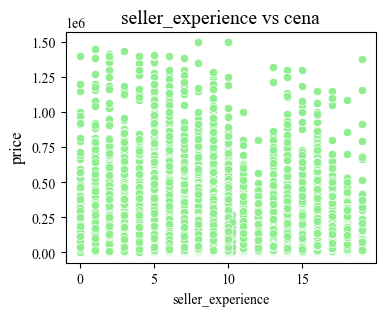

In [200]:
quantitative_vars = ['price', 'mileage', 'engine_displacement', 'power', 'car_age', 'seller_experience']
for var in quantitative_vars[1:]:
    plt.figure(figsize=(4, 3))
    sns.scatterplot(x=df5[var], y=df5['price'], color='lightgreen')
    plt.title(f'{var} vs cena', fontsize=14)
    plt.ylabel('price', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

### Wykresy gęstości

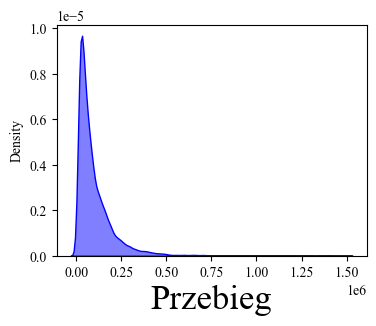

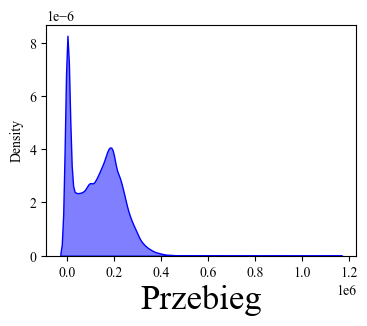

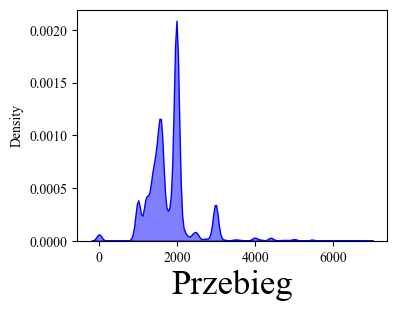

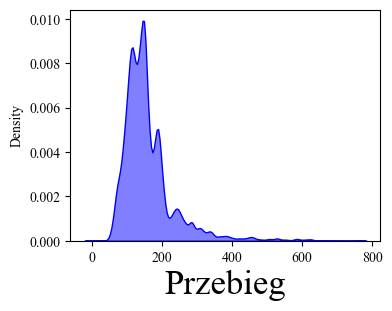

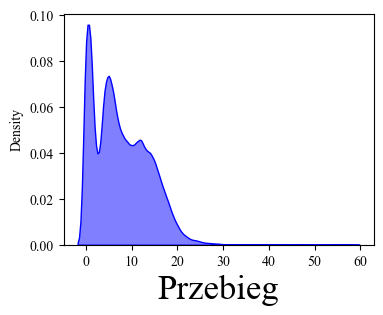

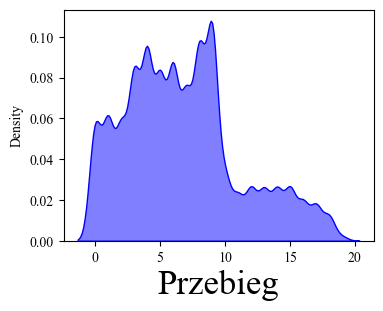

In [201]:
for var in quantitative_vars:
    plt.figure(figsize=(4, 3))
    sns.kdeplot(df5[var], fill=True, color="blue", alpha=0.5)
    plt.xlabel('Przebieg', fontsize=25)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()


## Eksploracyjna analiza danych

### Statystyki opisowe

In [202]:
# Usunięcie 30 pojazdów z napędem CNG
df5 = df5[df5['fuel_type'] != 'Gasoline + CNG']
df5 = df5[df5['fuel_type'].notna()]  
df5 = df5[df5['fuel_type'] != '']    
df5.describe().round(2)

,price,mileage,engine_displacement,power,car_age,seller_experience
count,99591.00,99591.00,99591.00,99591.00,99591.00,99591.00
mean,98905.93,126940.36,1806.73,158.87,7.72,6.77
std,111747.43,96641.97,642.69,74.86,5.96,4.45
min,1880.00,0.00,0.00,1.00,0.00,0.00
25%,31900.00,33347.00,1482.00,115.00,3.00,3.00
50%,63500.00,130260.00,1796.00,142.00,7.00,6.00
75%,126715.00,198600.00,1995.00,182.00,12.00,9.00
max,1500000.00,1142257.00,6834.00,761.00,58.00,19.00


In [203]:
pivot_table = pd.pivot_table(df5, values='car_age', index='state', columns='rear_parking_camera', aggfunc='mean')
print(pivot_table)
pivot_table = pd.pivot_table(df5, values='car_age', index='state', columns='vat', aggfunc='mean')
print(pivot_table)
pivot_table = pd.pivot_table(df5, values='car_age', index='state', columns='leather_upholstery', aggfunc='mean')
print(pivot_table)
pivot_table = pd.pivot_table(df5, values='car_age', index='state', columns='front_lamps_in_led_technology', aggfunc='mean')
print(pivot_table)
pivot_table = pd.pivot_table(df5, values='car_age', index='state', columns='electrically_adjustable_passenger_seat', aggfunc='mean')
print(pivot_table)

for col in categorical_columns:
    pivot_table = pd.pivot_table(df5, values='car_age', index=col, aggfunc='mean')
    print(f"Średnia wartość dla {col}:")
    print(pivot_table)

C:\Users\kacpr\AppData\Local\Temp\ipykernel_14080\2848583088.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(df5, values='car_age', index='state', columns='rear_parking_camera', aggfunc='mean')
C:\Users\kacpr\AppData\Local\Temp\ipykernel_14080\2848583088.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(df5, values='car_age', index='state', columns='vat', aggfunc='mean')
C:\Users\kacpr\AppData\Local\Temp\ipykernel_14080\2848583088.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this

rear_parking_camera      False      True
state                                   
New                   0.390266  0.400741
Used                 10.729260  5.526989
vat          Nie       Tak
state                     
New     0.424188  0.391039
Used   10.948462  4.665787
leather_upholstery     False      True
state                                 
New                 0.386714  0.438776
Used                9.336811  8.491899
front_lamps_in_led_technology      False      True
state                                             
New                             0.396051  0.397223
Used                           10.488934  4.461479
electrically_adjustable_passenger_seat     False      True
state                                                     
New                                     0.390408  0.421211
Used                                    9.400393  8.137333
Średnia wartość dla seller_type:
                     car_age
seller_type                 
Authorized Dealer   2.031141
Dealer      

C:\Users\kacpr\AppData\Local\Temp\ipykernel_14080\2848583088.py:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(df5, values='car_age', index=col, aggfunc='mean')
C:\Users\kacpr\AppData\Local\Temp\ipykernel_14080\2848583088.py:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(df5, values='car_age', index=col, aggfunc='mean')


In [204]:
categorical_columns = [
    'seller_type', 'body_type', 'number_of_doors', 'state', 'fuel_type', 'transmission', 'leather_upholstery',
    'front_lamps_in_led_technology', 'rear_parking_camera', 'electrically_adjustable_passenger_seat', 'vat'
]

for col in categorical_columns:
    pivot_table = pd.pivot_table(df5, values='price', index=col, aggfunc='mean')
    print(f"Średnia cena dla {col}:")
    print(pivot_table)

Średnia cena dla seller_type:
                           price
seller_type                     
Authorized Dealer  178498.203125
Dealer              97820.757812
Private person      63490.757812
Średnia cena dla body_type:
                       price
body_type                   
Cabriolet      212150.671875
City cars       42216.820312
Compact         60548.203125
Coupe          208185.875000
Minivan         66068.742188
SUV            138195.421875
Sedan          130205.507812
Small cars      40663.394531
Station wagon   70018.250000
Średnia cena dla number_of_doors:
                         price
number_of_doors               
2.0              237633.578125
3.0               37294.515625
4.0              143355.937500
5.0               93390.414062
6.0               44598.078125
Średnia cena dla state:
               price
state               
New    210606.828125
Used    76695.632812
Średnia cena dla fuel_type:
                        price
fuel_type                    
Diesel     

C:\Users\kacpr\AppData\Local\Temp\ipykernel_14080\1121101610.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(df5, values='price', index=col, aggfunc='mean')
C:\Users\kacpr\AppData\Local\Temp\ipykernel_14080\1121101610.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(df5, values='price', index=col, aggfunc='mean')
C:\Users\kacpr\AppData\Local\Temp\ipykernel_14080\1121101610.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = p

In [205]:
categorical_columns = [
    'seller_type', 'body_type', 'number_of_doors', 'state', 'fuel_type', 'transmission', 'leather_upholstery',
    'front_lamps_in_led_technology', 'rear_parking_camera', 'electrically_adjustable_passenger_seat', 'vat'
]

for col in categorical_columns:
    pivot_table = pd.pivot_table(df5, values='car_age', index=col, aggfunc='mean')
    print(f"Średnia wiek dla {col}:")
    print(pivot_table)

Średnia wiek dla seller_type:
                     car_age
seller_type                 
Authorized Dealer   2.031141
Dealer              7.268904
Private person     10.692993
Średnia wiek dla body_type:
                 car_age
body_type               
Cabriolet      13.252818
City cars       9.158725
Compact         8.460017
Coupe           7.956025
Minivan        10.061552
SUV             5.439507
Sedan           7.979674
Small cars      8.983854
Station wagon   8.668861
Średnia wiek dla number_of_doors:
                   car_age
number_of_doors           
2.0              11.032696
3.0              13.044245
4.0               8.081730
5.0               7.398060
6.0              13.000000
Średnia wiek dla state:
        car_age
state          
New    0.396598
Used   9.172330
Średnia wiek dla fuel_type:
                  car_age
fuel_type                
Diesel           8.616547
Electric         1.628601
Gasoline         7.354427
Gasoline + LPG  10.917546
Hybrid           2.155324
Ś

C:\Users\kacpr\AppData\Local\Temp\ipykernel_14080\2283811487.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(df5, values='car_age', index=col, aggfunc='mean')
C:\Users\kacpr\AppData\Local\Temp\ipykernel_14080\2283811487.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(df5, values='car_age', index=col, aggfunc='mean')
C:\Users\kacpr\AppData\Local\Temp\ipykernel_14080\2283811487.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table

Średnia wiek dla front_lamps_in_led_technology:
                                car_age
front_lamps_in_led_technology          
False                          9.282808
True                           3.250000
Średnia wiek dla rear_parking_camera:
                      car_age
rear_parking_camera          
False                9.685860
True                 4.058228
Średnia wiek dla electrically_adjustable_passenger_seat:
                                         car_age
electrically_adjustable_passenger_seat          
False                                   7.937125
True                                    6.739342
Średnia wiek dla vat:
       car_age
vat           
Nie  10.480965
Tak   3.087369


C:\Users\kacpr\AppData\Local\Temp\ipykernel_14080\2283811487.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(df5, values='car_age', index=col, aggfunc='mean')
C:\Users\kacpr\AppData\Local\Temp\ipykernel_14080\2283811487.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(df5, values='car_age', index=col, aggfunc='mean')
C:\Users\kacpr\AppData\Local\Temp\ipykernel_14080\2283811487.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table

In [206]:
for col in categorical_columns:
    print(f"Liczność dla {col}:")
    print(df5[col].value_counts())
    print()


Liczność dla seller_type:
seller_type
Private person       43188
Dealer               36686
Authorized Dealer    19717
Name: count, dtype: int64

Liczność dla body_type:
body_type
SUV              30400
Station wagon    20955
Compact          15469
Sedan            13579
Minivan           7847
City cars         6464
Coupe             2274
Small cars        1982
Cabriolet          621
Name: count, dtype: int64

Liczność dla number_of_doors:
number_of_doors
5.0    84530
4.0    10082
3.0     3345
2.0     1621
6.0       13
Name: count, dtype: int64

Liczność dla state:
state
Used    83073
New     16518
Name: count, dtype: int64

Liczność dla fuel_type:
fuel_type
Gasoline          48165
Diesel            43575
Hybrid             4320
Gasoline + LPG     2559
Electric            972
Gasoline + CNG        0
Name: count, dtype: int64

Liczność dla transmission:
transmission
Manual       55686
Automatic    43905
Name: count, dtype: int64

Liczność dla leather_upholstery:
leather_upholstery
False

### Wykresy

#### Najdroższe i najtańsze samochody (producent)

C:\Users\kacpr\AppData\Local\Temp\ipykernel_14080\2471095984.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_10_brands = df5.groupby('vehicle_brand')['price'].mean().nlargest(10).index


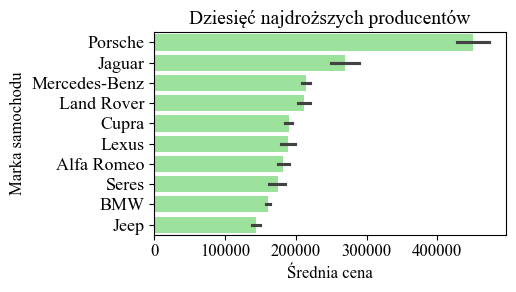

In [207]:
plt.rcParams['font.family'] = 'Times New Roman'
top_10_brands = df5.groupby('vehicle_brand')['price'].mean().nlargest(10).index
filtered_df = df5[df5['vehicle_brand'].isin(top_10_brands)]

plt.figure(figsize=(5,3))
sns.barplot(
    x=filtered_df['price'],
    y=filtered_df['vehicle_brand'],
    orient='h',
    order=top_10_brands,
    color='lightgreen'
)
plt.title('Dziesięć najdroższych producentów', fontsize=14)
plt.xlabel('Średnia cena', fontsize=12)
plt.ylabel('Marka samochodu', fontsize=12)
plt.tight_layout()

plt.yticks(fontsize=13)
plt.xticks(fontsize=12)
plt.show()

C:\Users\kacpr\AppData\Local\Temp\ipykernel_14080\3362214649.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_10_brands = df5.groupby('vehicle_brand')['price'].mean().nsmallest(10).index


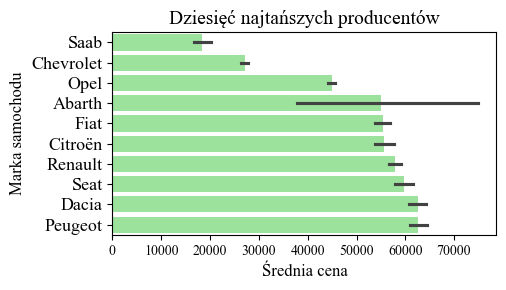

In [208]:
top_10_brands = df5.groupby('vehicle_brand')['price'].mean().nsmallest(10).index
filtered_df = df5[df5['vehicle_brand'].isin(top_10_brands)]

plt.figure(figsize=(5,3))
sns.barplot(
    x=filtered_df['price'],
    y=filtered_df['vehicle_brand'],
    orient='h',
    order=top_10_brands,
    color='lightgreen'
)
plt.title('Dziesięć najtańszych producentów',fontsize=14)
plt.xlabel('Średnia cena',fontsize=12)
plt.ylabel('Marka samochodu',fontsize=12)

plt.tight_layout()
plt.yticks(fontsize=13)

plt.xticks(fontsize=10)
plt.show()

#### Najpopularniejsi producenci i modele

vehicle_brand
BMW              9599
Volkswagen       9084
Audi             8378
Opel             7626
Ford             7554
Skoda            6795
Mercedes-Benz    6302
Renault          4980
Toyota           4368
Hyundai          4009
Name: count, dtype: int64


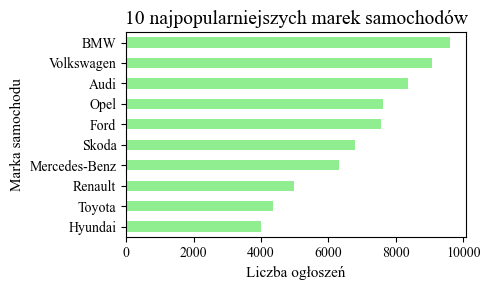

In [209]:
most_popular_brands = df5['vehicle_brand'].value_counts().nlargest(10)
print(most_popular_brands)

ax = most_popular_brands.iloc[::-1].plot(kind='barh', color='lightgreen', figsize=(5,3))
ax.set_title('10 najpopularniejszych marek samochodów',fontsize=14)
ax.set_xlabel('Liczba ogłoszeń',fontsize=11)
ax.set_ylabel('Marka samochodu',fontsize=11)
plt.tight_layout()
plt.show()




vehicle_model
Octavia     2496
Astra       2465
A4          2155
Seria 3     2064
Seria 5     1980
Golf        1974
Focus       1905
Passat      1838
A6          1779
Insignia    1522
Name: count, dtype: int64


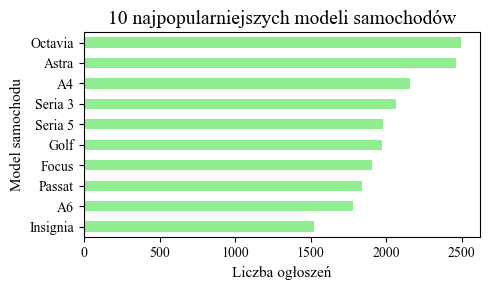

In [210]:
most_popular_brands = df5['vehicle_model'].value_counts().nlargest(10)
print(most_popular_brands)

ax = most_popular_brands.iloc[::-1].plot(kind='barh', color='lightgreen',figsize=(5,3))
ax.set_title('10 najpopularniejszych modeli samochodów',fontsize=14)
ax.set_xlabel('Liczba ogłoszeń',fontsize=11)
ax.set_ylabel('Model samochodu',fontsize=11)
plt.tight_layout()
plt.show()

#### Typ napędu

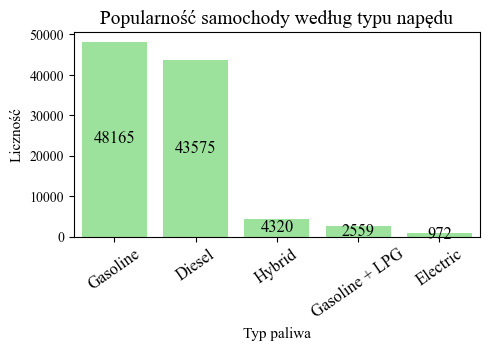

In [211]:


if hasattr(df5['fuel_type'], 'cat'):
    df5['fuel_type'] = df5['fuel_type'].cat.remove_unused_categories()

plt.figure(figsize=(5,3))
ax = sns.countplot(x=df5['fuel_type'], order=df5['fuel_type'].value_counts().index, color='lightgreen')
plt.title('Popularność samochody według typu napędu',fontsize=14)
plt.xlabel('Typ paliwa',fontsize=11)
plt.ylabel('Liczność',fontsize=11)

plt.tight_layout()
plt.xticks(fontsize=12, rotation=35)
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height() / 2.),
        ha='center', va='center', fontsize=12, color='black'
    )

plt.show()


C:\Users\kacpr\AppData\Local\Temp\ipykernel_14080\2375986102.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order=df5.groupby('fuel_type')['price'].mean().sort_values(ascending=False).index


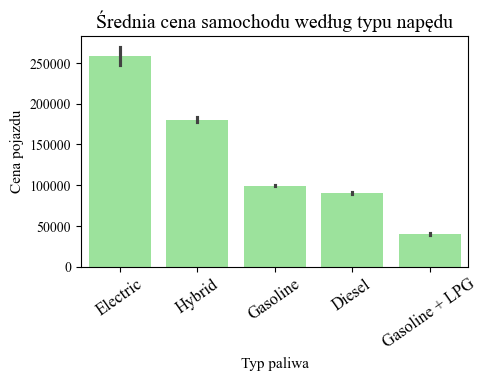

In [212]:
plt.rcParams['font.family'] = 'Times New Roman'

plt.figure(figsize=(5,3))
sns.barplot(
    x=df5['fuel_type'],
    y=df5['price'],
    color='lightgreen',
    order=df5.groupby('fuel_type')['price'].mean().sort_values(ascending=False).index
)
plt.title('Średnia cena samochodu według typu napędu', fontsize=14, fontname='Times New Roman')
plt.xlabel('Typ paliwa', fontsize=11, fontname='Times New Roman')
plt.ylabel('Cena pojazdu', fontsize=11, fontname='Times New Roman')
plt.xticks(fontsize=12, rotation=35)
plt.show()

In [213]:
df5.to_csv('dane_po_transformacji.csv')

#### Liczności zmiennych kategorycznych i binarnych

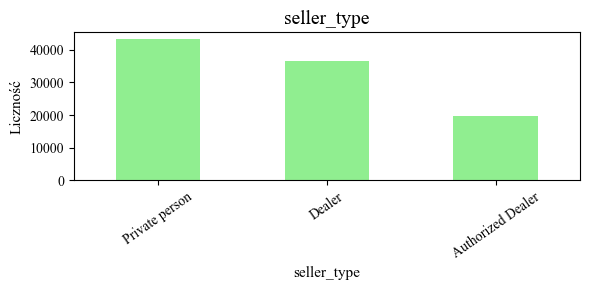

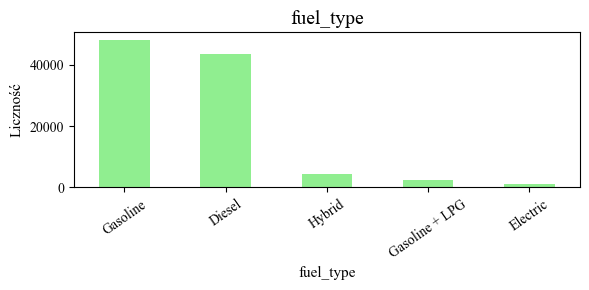

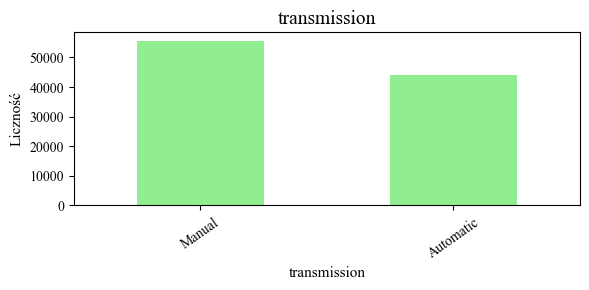

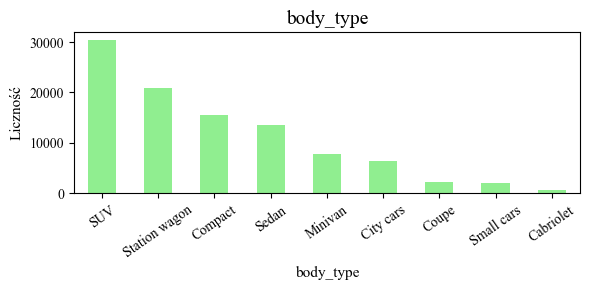

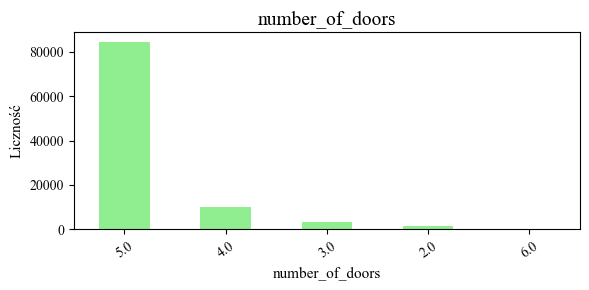

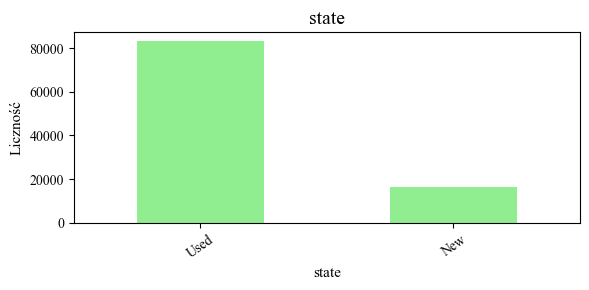

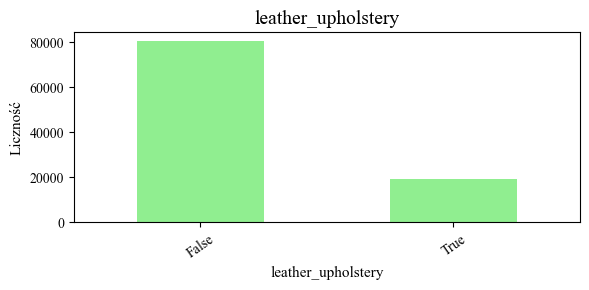

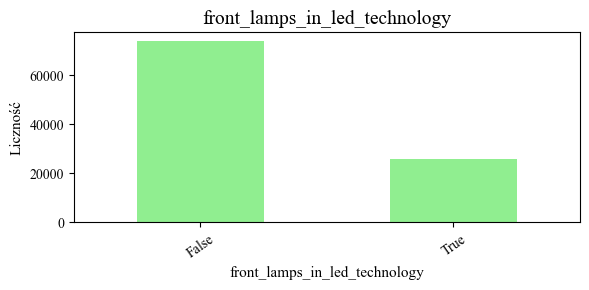

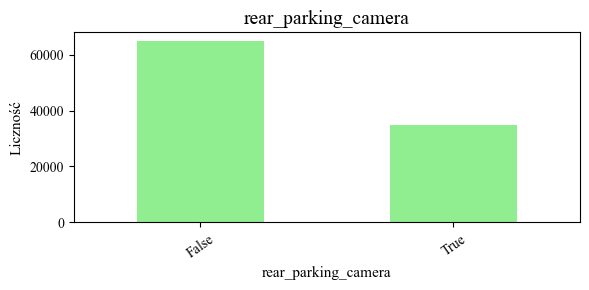

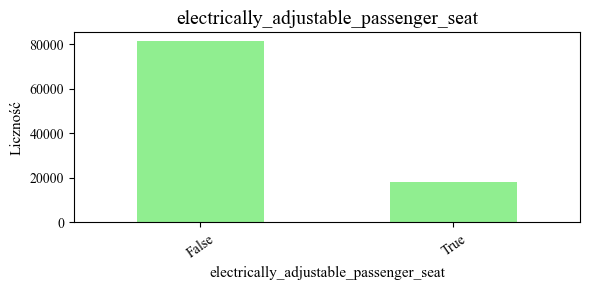

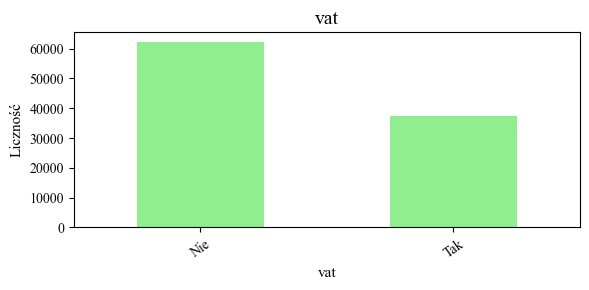

In [214]:
categorical_columns = [
    'seller_type', 'fuel_type', 'transmission', 'body_type',
    'number_of_doors', 'state', 'leather_upholstery', 'front_lamps_in_led_technology',
    'rear_parking_camera', 'electrically_adjustable_passenger_seat', 'vat'
]

for col in categorical_columns:
    plt.figure(figsize=(6, 3))
    df5[col].value_counts().plot(kind='bar', color='#90ee90')  
    plt.title(f'{col}',fontsize=14)
    plt.xlabel(f'{col}',fontsize=11)
    plt.ylabel('Liczność',fontsize=11)
    plt.xticks(rotation=35)
    plt.tight_layout()
    plt.show()

# Zastosowanie modeli

Proces doboru hiperparametrów znajduje się w pliku ParameterTuning.ipynb

## Zastosowanie transformacji logarytmicznej i pierwiastkowej na zmiennej zależnej

In [215]:
df5=df5.drop('vehicle_brand',axis=1)
df4_log=df5.copy()
df4_log['price']=np.log(df4_log['price'])

df4_sqrt=df5.copy()
df4_sqrt['price']=np.sqrt(df4_sqrt['price'])

## Zestandaryzowanie cech numerycznych oraz one hot encoding na zmienne kategoryczne

In [216]:
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
numeric_features = ['power', 'mileage', 'car_age','engine_displacement','seller_experience']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['seller_type', 'fuel_type','vehicle_model', 'transmission', 'body_type','number_of_doors','state','leather_upholstery',
       'front_lamps_in_led_technology', 'rear_parking_camera',
       'electrically_adjustable_passenger_seat', 'vat']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


y = df5['price']
X = df5.drop('price', axis=1)
X_preprocessed = preprocessor.fit_transform(X)
y_log = df4_log['price']
X_log = df4_log.drop('price', axis=1)
X_log_preprocessed = preprocessor.fit_transform(X_log)

y_sqrt = df4_sqrt['price']
X_sqrt = df4_sqrt.drop('price', axis=1)
X_sqrt_preprocessed = preprocessor.fit_transform(X_sqrt)


## Podział danych na zbiór testowy i treningowy

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2,
                                                    random_state=0,shuffle=True)

X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log_preprocessed, y_log, test_size=0.2,
                                                    random_state=0,shuffle=True)

X_sqrt_train, X_sqrt_test, y_sqrt_train, y_sqrt_test = train_test_split(X_sqrt_preprocessed, y_sqrt, test_size=0.2,
                                                    random_state=0,shuffle=True)

In [53]:
X_train.shape

(79672, 289)

## Regresja liniowa

In [218]:
from sklearn.linear_model import LinearRegression
regresja = LinearRegression()
regresja.fit(X_train, y_train)

y_pred_Reg=regresja.predict(X_test)
MAPE_Reg=mean_absolute_percentage_error(y_pred_Reg,y_test)
MAE_Reg=mean_absolute_error(y_pred_Reg,y_test)


### Wykresy dotyczące założeń regresji wielorakiej bez transformacji

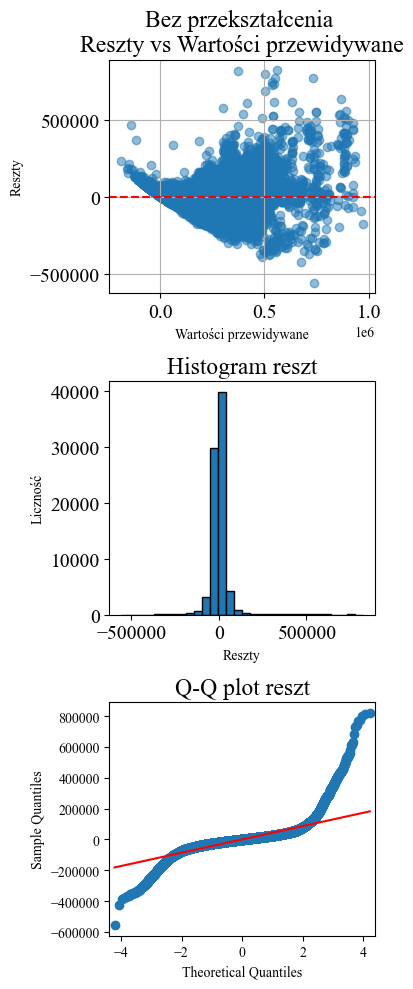

In [219]:
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

import scipy.stats as stats


y_train_pred = regresja.predict(X_train)
residuals = y_train - y_train_pred


fig, axs = plt.subplots(3, 1, figsize=(4, 10))

# 1. Reszty vs Wartości przewidywane
axs[0].scatter(y_train_pred, residuals, alpha=0.5)
axs[0].axhline(0, color='red', linestyle='--')
axs[0].set_xlabel('Wartości przewidywane')
axs[0].set_ylabel('Reszty')
axs[0].set_title('Bez przekształcenia \nReszty vs Wartości przewidywane', fontsize=17)
axs[0].grid()
axs[0].tick_params(axis='x', labelsize=14)
axs[0].tick_params(axis='y', labelsize=14)

# 2. Histogram reszt
axs[1].hist(residuals, bins=30, edgecolor='k')
axs[1].set_title('Histogram reszt', fontsize=17)
axs[1].set_xlabel('Reszty')
axs[1].set_ylabel('Liczność')
axs[1].tick_params(axis='x', labelsize=14)
axs[1].tick_params(axis='y', labelsize=14)

# 3. Q-Q plot reszt
import statsmodels.api as sm
sm.qqplot(residuals, line='s', ax=axs[2])
axs[2].set_title('Q-Q plot reszt',fontsize=17)

plt.tight_layout()
plt.show()



#### Testy na homoskedastyczność i normalność rozkładu reszt

In [220]:
bartlett_stat, bartlett_p = stats.bartlett(y_train_pred, residuals)
print(f"Bartlett's test: stat={bartlett_stat:.4f}, p-value={bartlett_p:.4g}")

levene_stat, levene_p = stats.levene(y_train_pred, residuals)
print(f"Levene's test: stat={levene_stat:.4f}, p-value={levene_p:.4g}")

dw = durbin_watson(residuals)
print(f'Wartość statystyki Durbin-Watsona: {dw:.2f}')

shapiro_stat, shapiro_p = stats.shapiro(residuals)
print(f'Shapiro-Wilk test: stat={shapiro_stat:.4f}, p-value={shapiro_p:.4g}')

Bartlett's test: stat=53219.6903, p-value=0
Levene's test: stat=23547.5447, p-value=0
Wartość statystyki Durbin-Watsona: 2.00
Shapiro-Wilk test: stat=0.7662, p-value=3.269e-131


C:\Users\kacpr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 79672.
  res = hypotest_fun_out(*samples, **kwds)


## Logarytm regresja

In [221]:
regresja.fit(X_log_train, y_log_train)
y_pred_Reg_log=regresja.predict(X_log_test)
MAPE_Reg_log=mean_absolute_percentage_error(np.exp(y_pred_Reg_log),np.exp(y_log_test))
MAE_Reg_log=mean_absolute_error(np.exp(y_pred_Reg_log),np.exp(y_log_test))

### Wykresy dotyczące założeń regresji liniowej z transformacją logarytmiczną na zmiennej zależnej

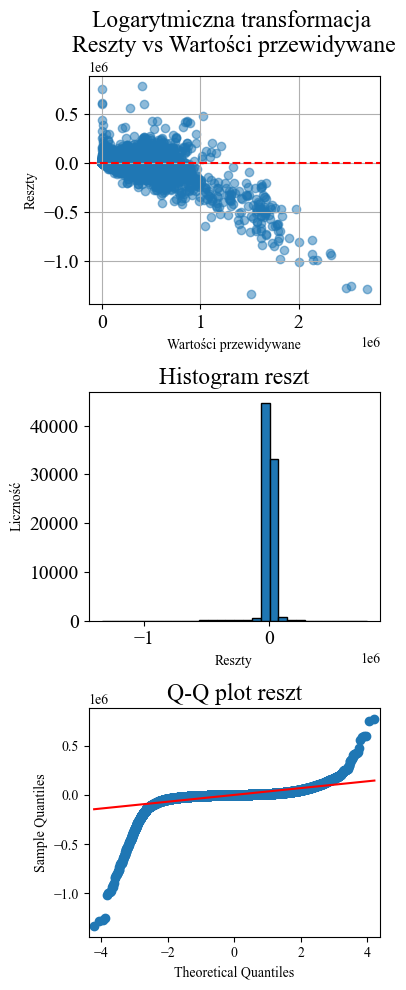

In [222]:
y_log_train_pred = regresja.predict(X_log_train)
residuals = np.exp(y_log_train) - np.exp(y_log_train_pred)


fig, axs = plt.subplots(3, 1, figsize=(4, 10))

# 1. Reszty vs Wartości przewidywane
axs[0].scatter(np.exp(y_log_train_pred), residuals, alpha=0.5)
axs[0].axhline(0, color='red', linestyle='--')
axs[0].set_xlabel('Wartości przewidywane')
axs[0].set_ylabel('Reszty')
axs[0].set_title('Logarytmiczna transformacja \nReszty vs Wartości przewidywane', fontsize=17)
axs[0].grid()
axs[0].tick_params(axis='x', labelsize=14)
axs[0].tick_params(axis='y', labelsize=14)

# 2. Histogram reszt
axs[1].hist(residuals, bins=30, edgecolor='k')
axs[1].set_title('Histogram reszt', fontsize=17)
axs[1].set_xlabel('Reszty')
axs[1].set_ylabel('Liczność')
axs[1].tick_params(axis='x', labelsize=14)
axs[1].tick_params(axis='y', labelsize=14)

# 3. Q-Q plot reszt
import statsmodels.api as sm
sm.qqplot(residuals, line='s', ax=axs[2])
axs[2].set_title('Q-Q plot reszt', fontsize=17)

plt.tight_layout()
plt.show()



#### Testy na homoskedastyczność i normalność rozkładu reszt

In [223]:
levene_stat, levene_p = stats.levene(np.exp(y_log_train_pred), residuals)
print(f"Levene's test: stat={levene_stat:.4f}, p-value={levene_p:.4g}")

bartlett_stat, bartlett_p = stats.bartlett(np.exp(y_log_train_pred), residuals)
print(f"Bartlett test: stat={bartlett_stat:.4f}, p-value={bartlett_p:.4g}")

dw = durbin_watson(residuals)
print(f'Wartość statystyki Durbin-Watsona: {dw:.2f}')


shapiro_stat, shapiro_p = stats.shapiro(residuals)
print(f'Shapiro-Wilk test: stat={shapiro_stat:.4f}, p-value={shapiro_p:.4g}')

Levene's test: stat=18226.5169, p-value=0
Bartlett test: stat=100168.0958, p-value=0
Wartość statystyki Durbin-Watsona: 2.00
Shapiro-Wilk test: stat=0.4288, p-value=5.378e-159


C:\Users\kacpr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 79672.
  res = hypotest_fun_out(*samples, **kwds)


## Pierwiastek regresja wieloraka

In [224]:
regresja.fit(X_sqrt_train, y_sqrt_train)
y_pred_Reg_sqrt=regresja.predict(X_sqrt_test)
MAPE_Reg_sqrt=mean_absolute_percentage_error(np.square(y_pred_Reg_sqrt),np.square(y_sqrt_test))
MAE_Reg_sqrt=mean_absolute_error(np.square(y_pred_Reg_sqrt),np.square(y_sqrt_test))

### Wykresy

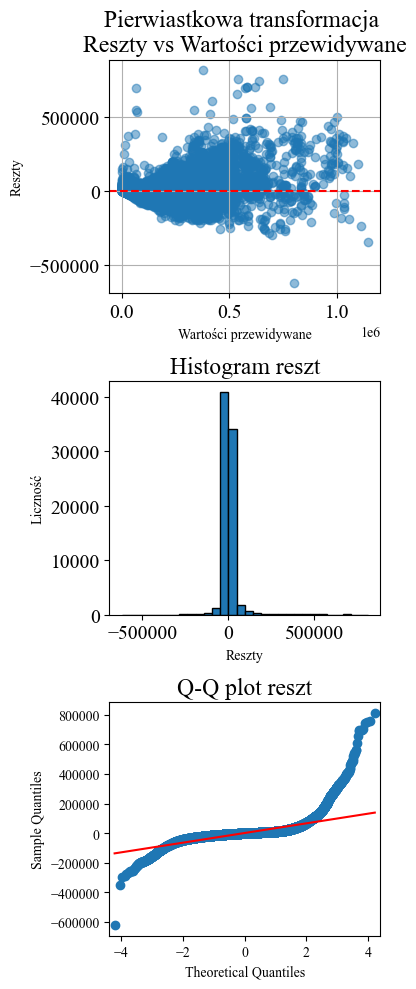

Bartlett's test: stat=80945.0215, p-value=0
Levene's test: stat=26615.2853, p-value=0
Wartość statystyki Durbin-Watsona: 2.00
Shapiro-Wilk test: stat=0.6036, p-value=2.644e-147


C:\Users\kacpr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 79672.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
y_sqrt_train_pred = regresja.predict(X_sqrt_train)
residuals = y_sqrt_train**2 - y_sqrt_train_pred**2


fig, axs = plt.subplots(3, 1, figsize=(4, 10))

# 1. Reszty vs Wartości przewidywane
axs[0].scatter(y_sqrt_train_pred**2, residuals, alpha=0.5)
axs[0].axhline(0, color='red', linestyle='--')
axs[0].set_xlabel('Wartości przewidywane')
axs[0].set_ylabel('Reszty')
axs[0].set_title('Pierwiastkowa transformacja \nReszty vs Wartości przewidywane', fontsize=17)
axs[0].grid()
axs[0].tick_params(axis='x', labelsize=14)
axs[0].tick_params(axis='y', labelsize=14)

# 2. Histogram reszt
axs[1].hist(residuals, bins=30, edgecolor='k')
axs[1].set_title('Histogram reszt', fontsize=17)
axs[1].set_xlabel('Reszty')
axs[1].set_ylabel('Liczność')
axs[1].tick_params(axis='x', labelsize=14)
axs[1].tick_params(axis='y', labelsize=14)

# 3. Q-Q plot reszt
import statsmodels.api as sm
sm.qqplot(residuals, line='s', ax=axs[2])
axs[2].set_title('Q-Q plot reszt', fontsize=17)

plt.tight_layout()
plt.show()



#### Testy na homoskedastyczność i normalność rozkładu reszt

In [226]:
bartlett_stat, bartlett_p = stats.bartlett(y_sqrt_train_pred**2, residuals)
print(f"Bartlett's test: stat={bartlett_stat:.4f}, p-value={bartlett_p:.4g}")

levene_stat, levene_p = stats.levene(y_sqrt_train_pred**2, residuals)
print(f"Levene's test: stat={levene_stat:.4f}, p-value={levene_p:.4g}")

dw = durbin_watson(residuals)
print(f'Wartość statystyki Durbin-Watsona: {dw:.2f}')

shapiro_stat, shapiro_p = stats.shapiro(residuals)
print(f'Shapiro-Wilk test: stat={shapiro_stat:.4f}, p-value={shapiro_p:.4g}')



Bartlett's test: stat=80945.0215, p-value=0
Levene's test: stat=26615.2853, p-value=0
Wartość statystyki Durbin-Watsona: 2.00
Shapiro-Wilk test: stat=0.6036, p-value=2.644e-147


## Regresja Ridge bez transformacji

In [147]:
from sklearn.linear_model import Ridge

ridge=Ridge(alpha=0.1,random_state=50)
ridge.fit(X_train, y_train)
y_pred_Ridge=ridge.predict(X_test)
MAPE_Ridge=mean_absolute_percentage_error(y_pred_Ridge,y_test)
MAE_Ridge=mean_absolute_error(y_pred_Ridge,y_test)

## Regresja Ridge z logarytmiczną transformacją na zmiennej zależnej

In [148]:
ridge=Ridge(alpha=1,random_state=50)
ridge.fit(X_log_train, y_log_train)
y_pred_Ridge_log=ridge.predict(X_log_test)
MAPE_Ridge_log=mean_absolute_percentage_error(np.exp(y_pred_Ridge_log),np.exp(y_log_test))
MAE_Ridge_log=mean_absolute_error(np.exp(y_pred_Ridge_log),np.exp(y_log_test))

## Regresja Ridge z transformacją pierwiastkową na zmiennej zależnej

In [149]:
ridge = Ridge(alpha=0.001,random_state=50)
ridge.fit(X_sqrt_train, y_sqrt_train)
y_pred_Ridge_sqrt = ridge.predict(X_sqrt_test)
MAPE_Ridge_sqrt = mean_absolute_percentage_error(np.square(y_pred_Ridge_sqrt), np.square(y_sqrt_test))
MAE_Ridge_sqrt = mean_absolute_error(np.square(y_pred_Ridge_sqrt), np.square(y_sqrt_test))

## Lasy losowe

In [150]:
from sklearn.ensemble import RandomForestRegressor


Forest=RandomForestRegressor(n_jobs=-1,max_features=50,n_estimators=300,random_state=50)
Forest.fit(X_train, y_train)
y_pred_Las=Forest.predict(X_test)
MAE_las=mean_absolute_error(y_test,y_pred_Las)
MAPE_las=mean_absolute_percentage_error(y_test,y_pred_Las)


## Lasy losowe z transformacją logarytmiczną na zmiennej zależnej

In [151]:

Forest=RandomForestRegressor(n_jobs=-1,max_features=50,n_estimators=300,random_state=50)
Forest.fit(X_log_train, y_log_train)
y_pred_Las_log=Forest.predict(X_log_test)
MAPE_las_log=mean_absolute_percentage_error(np.exp(y_log_test),np.exp(y_pred_Las_log))
MAE_las_log=mean_absolute_error(np.exp(y_log_test),np.exp(y_pred_Las_log))

## Lasy losowe z transformacją pierwiastkową na zmiennej zależnej

In [152]:
Forest=RandomForestRegressor(n_jobs=-1,max_features=50,n_estimators=300,random_state=50)
Forest.fit(X_sqrt_train, y_sqrt_train)
y_pred_Las_sqrt = Forest.predict(X_sqrt_test)
MAPE_las_sqrt = mean_absolute_percentage_error(np.square(y_sqrt_test), np.square(y_pred_Las_sqrt))
MAE_las_sqrt = mean_absolute_error(np.square(y_sqrt_test), np.square(y_pred_Las_sqrt))

# Perceptron wielowarstwowy

In [153]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
Network=MLPRegressor(hidden_layer_sizes=(500, 300, 150),activation='relu',learning_rate='constant',batch_size='auto',early_stopping=True,random_state=50)
Network.fit(X_train, y_train)
y_pred_MLP=Network.predict(X_test)
MAE_MLP=mean_absolute_error(y_test,y_pred_MLP)
MAPE_MLP=mean_absolute_percentage_error(y_test,y_pred_MLP)


## Perceptron wielowarstowy z transformacją logarytmiczną na zmiennej zależnej

In [154]:

Network=MLPRegressor(hidden_layer_sizes=(300),activation='relu',learning_rate='constant',batch_size='auto',early_stopping=True,random_state=50)
Network.fit(X_log_train, y_log_train)
y_pred_MLP_log=Network.predict(X_log_test)
MAE_MLP_log=mean_absolute_error(np.exp(y_log_test),np.exp(y_pred_MLP_log))
MAPE_MLP_log=mean_absolute_percentage_error(np.exp(y_log_test),np.exp(y_pred_MLP_log))

## Perceptron wielowarstowy z transformacją pierwiastkową na zmiennej zależnej

In [155]:

Network = MLPRegressor(hidden_layer_sizes=(500),activation='relu',learning_rate='constant',batch_size='auto',early_stopping=True,random_state=50)
Network.fit(X_sqrt_train, y_sqrt_train)
y_pred_MLP_sqrt = Network.predict(X_sqrt_test)
MAE_MLP_sqrt = mean_absolute_error(np.square(y_sqrt_test), np.square(y_pred_MLP_sqrt))
MAPE_MLP_sqrt = mean_absolute_percentage_error(np.square(y_sqrt_test), np.square(y_pred_MLP_sqrt))

## XGBOOST

In [204]:
import xgboost as xgb


xgb_model = xgb.XGBRegressor(
    objective='reg:linear',
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=12,
    random_state=50
)

xgb_model.fit(X_train, y_train,)
y_pred_XGB=xgb_model.predict(X_test)
MAE_XGB=mean_absolute_error(y_test,y_pred_XGB)
MAPE_XGB=mean_absolute_percentage_error(y_test,y_pred_XGB)

C:\Users\kacpr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [11:30:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


## XGBoost z transformacją logarytmiczną na zmiennej zależnej

In [209]:

xgb_model=xgb.XGBRegressor(objective='reg:linear',n_estimators=1000,learning_rate=0.1,max_depth=10,random_state=50)
xgb_model.fit(X_log_train, y_log_train)
y_pred_XGB_log=xgb_model.predict(X_log_test)
MAPE_XGB_log=mean_absolute_percentage_error(np.exp(y_log_test),np.exp(y_pred_XGB_log))
MAE_XGB_log=mean_absolute_error(np.exp(y_log_test),np.exp(y_pred_XGB_log))

C:\Users\kacpr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [11:33:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


## XGBoost z transformacją pierwiastkową na zmiennej zależnej

In [158]:

xgb_model = xgb.XGBRegressor(objective='reg:linear', n_estimators=1000, learning_rate=0.1, max_depth=10,random_state=50)
xgb_model.fit(X_sqrt_train, y_sqrt_train)
y_pred_XGB_sqrt = xgb_model.predict(X_sqrt_test)
MAPE_XGB_sqrt = mean_absolute_percentage_error(np.square(y_sqrt_test), np.square(y_pred_XGB_sqrt))
MAE_XGB_sqrt = mean_absolute_error(np.square(y_sqrt_test), np.square(y_pred_XGB_sqrt))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:09:31] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


# Wyniki badania

## Porównanie przykładowych predykcji

In [159]:
comparison_table = pd.DataFrame({
    'Actual': np.exp(y_log_test),
    'MLPLog': np.exp(y_pred_MLP_log),
    'MLP': y_pred_MLP,
    'LogLinear': np.exp(y_pred_Reg_log),
    'RidgeLog': np.exp(y_pred_Ridge_log),
    'laslosLog': np.exp(y_pred_Las_log),
    'xgboostLog': np.exp(y_pred_XGB_log),
    'Linear': y_pred_Reg,
    'Ridge': y_pred_Ridge,
    'laslos': y_pred_Las,
    'xgboost': y_pred_XGB,
    'MLPSqrt': np.square(y_pred_MLP_sqrt),
    'LinearSqrt': np.square(y_pred_Reg_sqrt),
    'RidgeSqrt': np.square(y_pred_Ridge_sqrt),
    'laslosSqrt': np.square(y_pred_Las_sqrt),
    'xgboostSqrt': np.square(y_pred_XGB_sqrt),
})


comparison_table.tail(20)

,Actual,MLPLog,MLP,LogLinear,RidgeLog,laslosLog,xgboostLog,Linear,Ridge,laslos,xgboost,MLPSqrt,LinearSqrt,RidgeSqrt,laslosSqrt,xgboostSqrt
60951,146000.031250,152970.251689,150897.777619,162439.386158,162893.670290,144302.546266,150636.734375,155420.613738,155601.130825,144473.052857,150101.078125,150787.929993,160243.573484,160267.474671,144406.553577,150372.000000
40483,37900.007812,39247.446479,37287.797729,41436.552645,41568.834222,34053.172386,34856.601562,64724.885271,64732.115556,35613.870000,36171.324219,39998.545729,52158.092121,52167.634390,34391.830065,35086.574219
68422,46899.980469,38482.581634,43336.728936,41277.445003,41108.015794,45902.397866,45215.894531,37456.830602,37401.004925,46193.690000,46499.617188,42792.052605,41504.501217,41543.038832,46429.410591,46026.386719
184346,64500.027344,58791.548267,59346.023982,50386.356468,50444.568006,67452.879475,66027.023438,62679.951176,62917.735756,69050.966667,67648.593750,61504.596202,57566.309641,57621.933473,67975.681275,64772.578125
24519,214900.046875,200660.324732,208804.207711,214162.184988,214036.724136,211858.196879,213503.421875,183435.056537,183422.738145,214226.593333,214540.359375,205697.971550,189954.818070,190032.900471,216575.944351,205082.796875
5586,113989.953125,115331.255702,116224.240974,107277.336269,107078.978912,107510.970295,113392.648438,129348.022942,129273.425935,107072.916667,115085.859375,121934.312446,119152.388947,119086.296893,106263.601823,107571.125000
43198,18900.000000,17984.586480,18683.312999,19016.424284,18969.798312,16480.632833,18962.755859,-12194.352069,-12118.948733,16590.320000,18628.171875,18409.420229,13469.934995,13488.596183,16353.915230,19762.642578
96098,91018.015625,86813.237450,93555.635564,80152.742522,79974.622885,82558.870279,86252.234375,102776.453872,102866.513257,86252.960000,87067.320312,100508.349165,91299.088169,91354.896309,84554.478546,79696.039062
158628,52900.003906,53427.274336,56171.723133,55908.108368,55807.850911,51530.725938,57710.691406,58613.954116,58658.799950,54310.133333,58080.050781,61914.050737,58973.002270,59027.397784,53942.829364,57505.585938
158924,99000.015625,81520.064720,79009.064217,77689.561368,77207.800378,77511.388595,82181.515625,142089.751675,141897.073103,79526.781667,80462.125000,77819.498100,105479.107469,105401.074934,78782.833638,81280.304688


## Tabela z błędami MAPE i MAE

In [184]:
errors_table = pd.DataFrame({
    'MLPLog': {'MAPE': MAPE_MLP_log, 'MAE': MAE_MLP_log},
    'MLP': {'MAPE': MAPE_MLP, 'MAE': MAE_MLP},
    'MLPSqrt': {'MAPE': MAPE_MLP_sqrt, 'MAE': MAE_MLP_sqrt},
    'LogLinear': {'MAPE': MAPE_Reg_log, 'MAE': MAE_Reg_log},
    'Linear': {'MAPE': MAPE_Reg, 'MAE': MAE_Reg},
    'LinearSqrt': {'MAPE': MAPE_Reg_sqrt, 'MAE': MAE_Reg_sqrt},
    'RidgeLog': {'MAPE': MAPE_Ridge_log, 'MAE': MAE_Ridge_log},
    'Ridge': {'MAPE': MAPE_Ridge, 'MAE': MAE_Ridge},
    'RidgeSqrt': {'MAPE': MAPE_Ridge_sqrt, 'MAE': MAE_Ridge_sqrt},
    'laslosLog': {'MAPE': MAPE_las_log, 'MAE': MAE_las_log},
    'laslos': {'MAPE': MAPE_las, 'MAE': MAE_las},
    'laslosSqrt': {'MAPE': MAPE_las_sqrt, 'MAE': MAE_las_sqrt},
    'xgboostLog': {'MAPE': MAPE_XGB_log, 'MAE': MAE_XGB_log},
    'xgboost': {'MAPE': MAPE_XGB, 'MAE': MAE_XGB},
    'xgboostSqrt': {'MAPE': MAPE_XGB_sqrt, 'MAE': MAE_XGB_sqrt}
})

errors_table.to_csv('errors_table.csv')
errors_table

,MLPLog,MLP,MLPSqrt,LogLinear,Linear,LinearSqrt,RidgeLog,Ridge,RidgeSqrt,laslosLog,laslos,laslosSqrt,xgboostLog,xgboost,xgboostSqrt
MAPE,0.107204,0.105164,0.102277,0.156961,1.805202,2.744044,0.157192,3.052490,2.767581,0.114423,0.122265,0.116835,0.099327,0.101921,0.100186
MAE,9282.388527,8384.570532,8353.539321,12984.364364,25436.292412,15344.922664,12965.810923,25441.211813,15344.473613,9808.866658,9514.655261,9560.761800,8357.212891,8372.809570,8325.394531


## Istotność cech modelu XGBoost

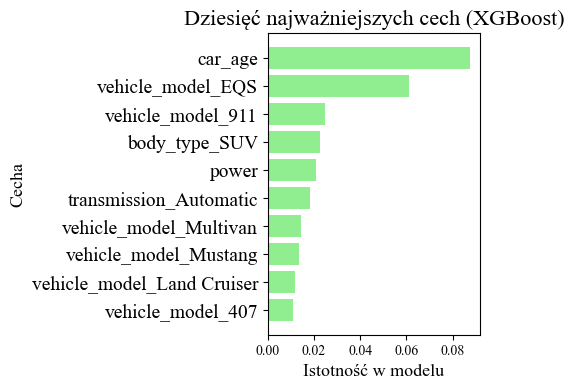

In [192]:

importances = xgb_model.feature_importances_

feature_names = []
feature_names.extend(numeric_features)
feature_names.extend(
    preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
)

indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_feature_names = np.array(feature_names)[indices]

plt.figure(figsize=(5, 4))
plt.barh(range(10), sorted_importances[:10][::-1], color='#90ee90')
plt.yticks(range(10), sorted_feature_names[:10][::-1])
plt.title('Dziesięć najważniejszych cech (XGBoost)', fontsize=16)
plt.ylabel('Cecha', fontsize=13)
plt.xlabel('Istotność w modelu', fontsize=13)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()